## CIFAR100 Using Keras
#### if the accuracy doesn't show up we will use image data generator to generate randomness in the data
#### 1. WE will create model in keras
#### 2. Create model in keras with image data generator
#### 3. Create model using only tensorflow.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

In [29]:
cifar=keras.datasets.cifar100

In [30]:

CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [31]:
(x_train,y_train),(x_test,y_test)=cifar.load_data()

In [32]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

### Data Preprocessing

In [33]:
x_train=x_train/255
x_test=x_test/255

In [34]:
y_train.dtype

dtype('int64')

In [35]:
y_train=tf.one_hot(y_train,depth=100)
y_train=tfds.as_numpy(y_train)
y_test=tf.one_hot(y_test,depth=100)
y_test=tfds.as_numpy(y_test)

In [36]:
y_test.dtype

dtype('float32')

In [37]:
y_test=np.reshape(y_test,(-1,100))

In [38]:
y_test.shape

(10000, 100)

In [39]:
y_train=np.reshape(y_train,(-1,100))

In [40]:
x_train.shape

(50000, 32, 32, 3)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


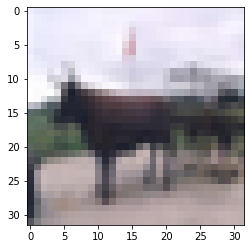

In [41]:
sample=x_train[8687]
plt.imshow(sample)
print(y_train[8687])
#print(CIFAR100_LABELS_LIST[y_train[8687][0]])

### This is going nice.

In [42]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten

In [43]:
model=keras.Sequential()
model.add(Conv2D(filters=32,kernel_size=[4,4],strides=(2,2),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=64,kernel_size=[4,4],strides=(2,2),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))
#model.add(Conv2D(filters=128,kernel_size=[4,4],strides=(2,2),activation='relu'))
#model.add(MaxPool2D((2,2)))
#model.add(Conv2D(filters=256,kernel_size=[4,4],strides=(2,2),activation='relu'))
#model.add(MaxPool2D((2,2)))
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(2048,activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(100))

In [44]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [126]:
x_train.shape,x_train.dtype,y_train.shape,y_train.dtype

((50000, 32, 32, 3), dtype('float64'), (50000, 100), dtype('float32'))

In [127]:
model.fit(x_train,y_train,epochs=25)

Train on 50000 samples
Epoch 1/25
50000/50000 [==============================] - 59s 1ms/sample - loss: 4.1100 - accuracy: 0.0576
Epoch 2/25
50000/50000 [==============================] - 64s 1ms/sample - loss: 3.7300 - accuracy: 0.1149
Epoch 3/25
50000/50000 [==============================] - 63s 1ms/sample - loss: 3.5662 - accuracy: 0.1450
Epoch 4/25
50000/50000 [==============================] - 58s 1ms/sample - loss: 3.4661 - accuracy: 0.1611
Epoch 5/25
50000/50000 [==============================] - 68s 1ms/sample - loss: 3.3855 - accuracy: 0.1780
Epoch 6/25
50000/50000 [==============================] - 59s 1ms/sample - loss: 3.3276 - accuracy: 0.1868
Epoch 7/25
50000/50000 [==============================] - 57s 1ms/sample - loss: 3.2784 - accuracy: 0.1967
Epoch 8/25
50000/50000 [==============================] - 62s 1ms/sample - loss: 3.2297 - accuracy: 0.2070
Epoch 9/25
50000/50000 [==============================] - 53s 1ms/sample - loss: 3.1981 - accuracy: 0.2102
Epoch 10/25
50

### WE have very low accuracy.
#### Lets changethe model.
#### We will take off strides and let it stride only 1 step at a time

In [129]:
model=keras.Sequential()
model.add(Conv2D(filters=32,kernel_size=[4,4],input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=[4,4],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=[4,4],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(100))
model.compile(optimizer='adam',
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=25)

Train on 50000 samples
Epoch 1/25
50000/50000 [==============================] - 42s 850us/sample - loss: 4.1668 - accuracy: 0.0596
Epoch 2/25
50000/50000 [==============================] - 43s 851us/sample - loss: 3.6534 - accuracy: 0.1344
Epoch 3/25
50000/50000 [==============================] - 41s 825us/sample - loss: 3.4332 - accuracy: 0.1772
Epoch 4/25
50000/50000 [==============================] - 43s 852us/sample - loss: 3.2762 - accuracy: 0.2026
Epoch 5/25
50000/50000 [==============================] - 43s 858us/sample - loss: 3.1700 - accuracy: 0.2231
Epoch 6/25
50000/50000 [==============================] - 43s 860us/sample - loss: 3.0741 - accuracy: 0.2381
Epoch 7/25
50000/50000 [==============================] - 41s 814us/sample - loss: 2.9918 - accuracy: 0.2556
Epoch 8/25
50000/50000 [==============================] - 40s 802us/sample - loss: 2.9226 - accuracy: 0.2699
Epoch 9/25
50000/50000 [==============================] - 40s 807us/sample - loss: 2.8590 - accuracy: 0.2

### This model has little more accuracy

In [130]:
model.metrics_names

['loss', 'accuracy']

#### Lets evaluate the model

In [132]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 4s 386us/sample - loss: 2.9449 - accuracy: 0.3134


[2.944863168334961, 0.3134]

### now lets add some more layers to it.

In [135]:
model=keras.Sequential()
model.add(Conv2D(filters=32,kernel_size=[2,2],input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=[2,2],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=128,kernel_size=[2,2],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=256,kernel_size=[2,2],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(100))
model.compile(optimizer='adam',
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=25)

Train on 50000 samples
Epoch 1/25
50000/50000 [==============================] - 47s 936us/sample - loss: 4.1750 - accuracy: 0.0522
Epoch 2/25
50000/50000 [==============================] - 47s 938us/sample - loss: 3.6677 - accuracy: 0.1246
Epoch 3/25
50000/50000 [==============================] - 46s 928us/sample - loss: 3.3867 - accuracy: 0.1772
Epoch 4/25
50000/50000 [==============================] - 46s 918us/sample - loss: 3.1973 - accuracy: 0.2125
Epoch 5/25
50000/50000 [==============================] - 45s 905us/sample - loss: 3.0663 - accuracy: 0.2361
Epoch 6/25
50000/50000 [==============================] - 48s 965us/sample - loss: 2.9710 - accuracy: 0.2548
Epoch 7/25
50000/50000 [==============================] - 48s 966us/sample - loss: 2.8814 - accuracy: 0.2742
Epoch 8/25
50000/50000 [==============================] - 48s 968us/sample - loss: 2.8051 - accuracy: 0.2882
Epoch 9/25
50000/50000 [==============================] - 48s 959us/sample - loss: 2.7541 - accuracy: 0.2

In [136]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 287us/sample - loss: 2.3620 - accuracy: 0.3893


[2.3620192943573, 0.3893]

### This is better than the pervious one.
#### Now we will add one more dense layer and change the number of neurons. WE will change the epochs also

In [137]:
model=keras.Sequential()
model.add(Conv2D(filters=32,kernel_size=[2,2],input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=[2,2],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=128,kernel_size=[2,2],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=256,kernel_size=[2,2],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(100))
model.compile(optimizer='adam',
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30)

Train on 50000 samples
Epoch 1/30
50000/50000 [==============================] - 61s 1ms/sample - loss: 4.1174 - accuracy: 0.0562
Epoch 2/30
50000/50000 [==============================] - 60s 1ms/sample - loss: 3.6020 - accuracy: 0.1347
Epoch 3/30
50000/50000 [==============================] - 60s 1ms/sample - loss: 3.2954 - accuracy: 0.1918
Epoch 4/30
50000/50000 [==============================] - 60s 1ms/sample - loss: 3.0847 - accuracy: 0.2299
Epoch 5/30
50000/50000 [==============================] - 59s 1ms/sample - loss: 2.9443 - accuracy: 0.2569
Epoch 6/30
50000/50000 [==============================] - 60s 1ms/sample - loss: 2.8313 - accuracy: 0.2817
Epoch 7/30
50000/50000 [==============================] - 57s 1ms/sample - loss: 2.7301 - accuracy: 0.2997
Epoch 8/30
50000/50000 [==============================] - 58s 1ms/sample - loss: 2.6428 - accuracy: 0.3174
Epoch 9/30
50000/50000 [==============================] - 57s 1ms/sample - loss: 2.5723 - accuracy: 0.3314
Epoch 10/30
50

In [139]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 5s 488us/sample - loss: 2.4890 - accuracy: 0.3877


[2.4890361431121826, 0.3877]

#### It is like overfitting in the training data. but while coming to evaluation we dnt have that much accuracy.
#### lets make some data random and then we will run the model.

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
image_gen=ImageDataGenerator(rotation_range=30,
                          width_shift_range=0.1,
                          height_shift_range=0.1,
                          rescale=1/255,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True,
                          fill_mode='nearest')

### Its working

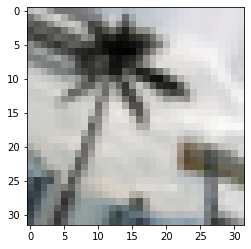

In [25]:
plt.imshow(image_gen.random_transform(x_train[425]))

In [26]:
image_gen.fit(x_train)

### Now lets create model and check accuracy

In [27]:
model=keras.Sequential()
model.add(Conv2D(filters=32,kernel_size=[2,2],input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=[2,2],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=128,kernel_size=[2,2],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=256,kernel_size=[2,2],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(100))
model.compile(optimizer='adam',
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(image_gen.flow(x_train,y_train,batch_size=50,shuffle=True,),epochs=30)

  ...
    to  
  ['...']
Train for 1000 steps
Epoch 1/30
1000/1000 [==============================] - 85s 85ms/step - loss: 4.6059 - accuracy: 0.0084
Epoch 2/30
1000/1000 [==============================] - 85s 85ms/step - loss: 4.6058 - accuracy: 0.0087
Epoch 3/30
1000/1000 [==============================] - 87s 87ms/step - loss: 4.6058 - accuracy: 0.0090
Epoch 4/30
1000/1000 [==============================] - 87s 87ms/step - loss: 4.6058 - accuracy: 0.0094
Epoch 5/30
1000/1000 [==============================] - 82s 82ms/step - loss: 4.6058 - accuracy: 0.0088
Epoch 6/30
1000/1000 [==============================] - 89s 89ms/step - loss: 4.6058 - accuracy: 0.0088
Epoch 7/30
1000/1000 [==============================] - 85s 85ms/step - loss: 4.6058 - accuracy: 0.0087
Epoch 8/30
1000/1000 [==============================] - 85s 85ms/step - loss: 4.6058 - accuracy: 0.0087
Epoch 9/30
1000/1000 [==============================] - 87s 87ms/step - loss: 4.6058 - accuracy: 0.0088
Epoch 10/30
1000/1